In [1]:
import pandas as pd

In [2]:
data_train=pd.read_csv(r"C:\Users\PIYUSH\Downloads\big-mart-sales-prediction\train.csv")

In [3]:
data_test=pd.read_csv(r"C:\Users\PIYUSH\Downloads\big-mart-sales-prediction\test.csv")

In [4]:
label_train=data_train["Item_Outlet_Sales"]

In [5]:
data_train.head()
df=data_train

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


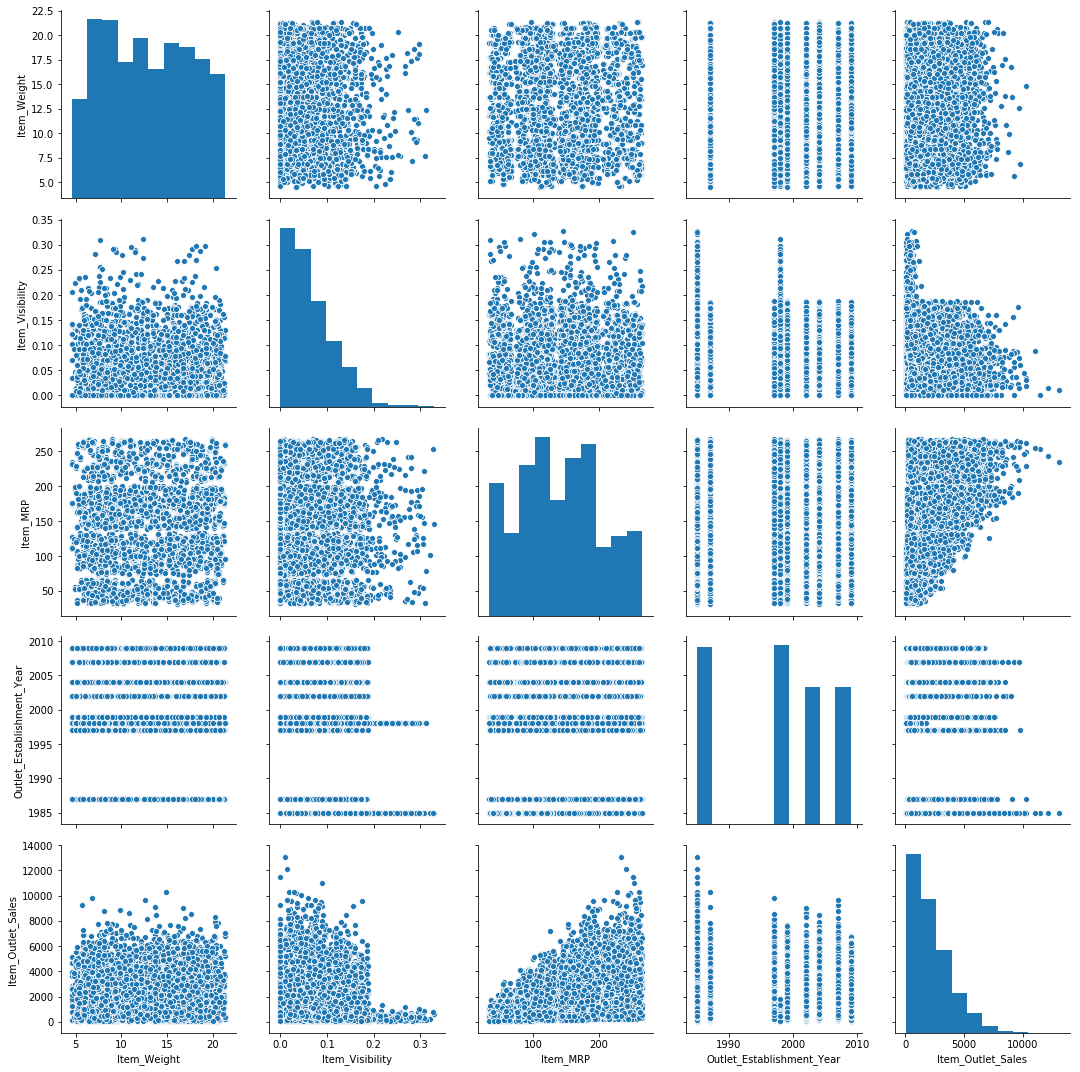

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, size=3);
plt.show()

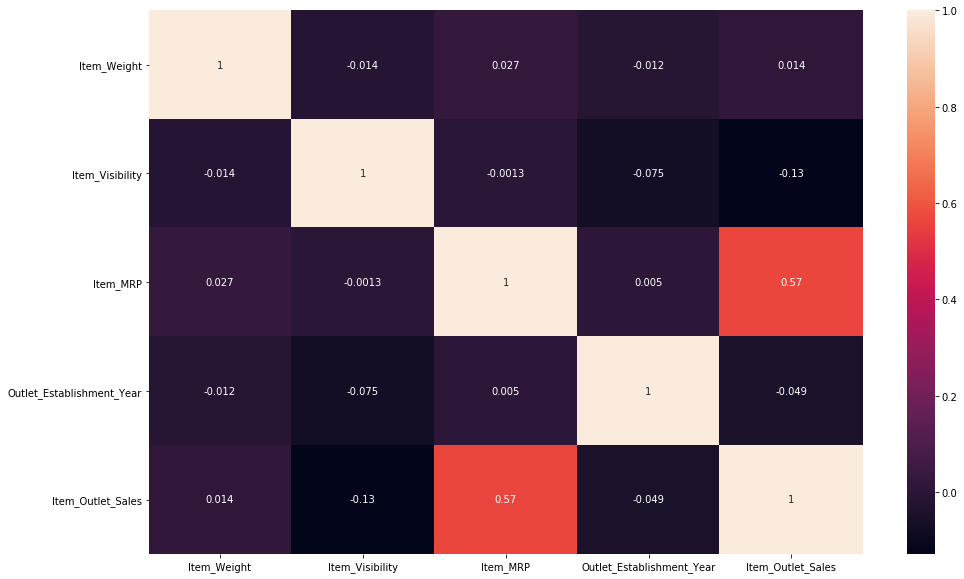

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


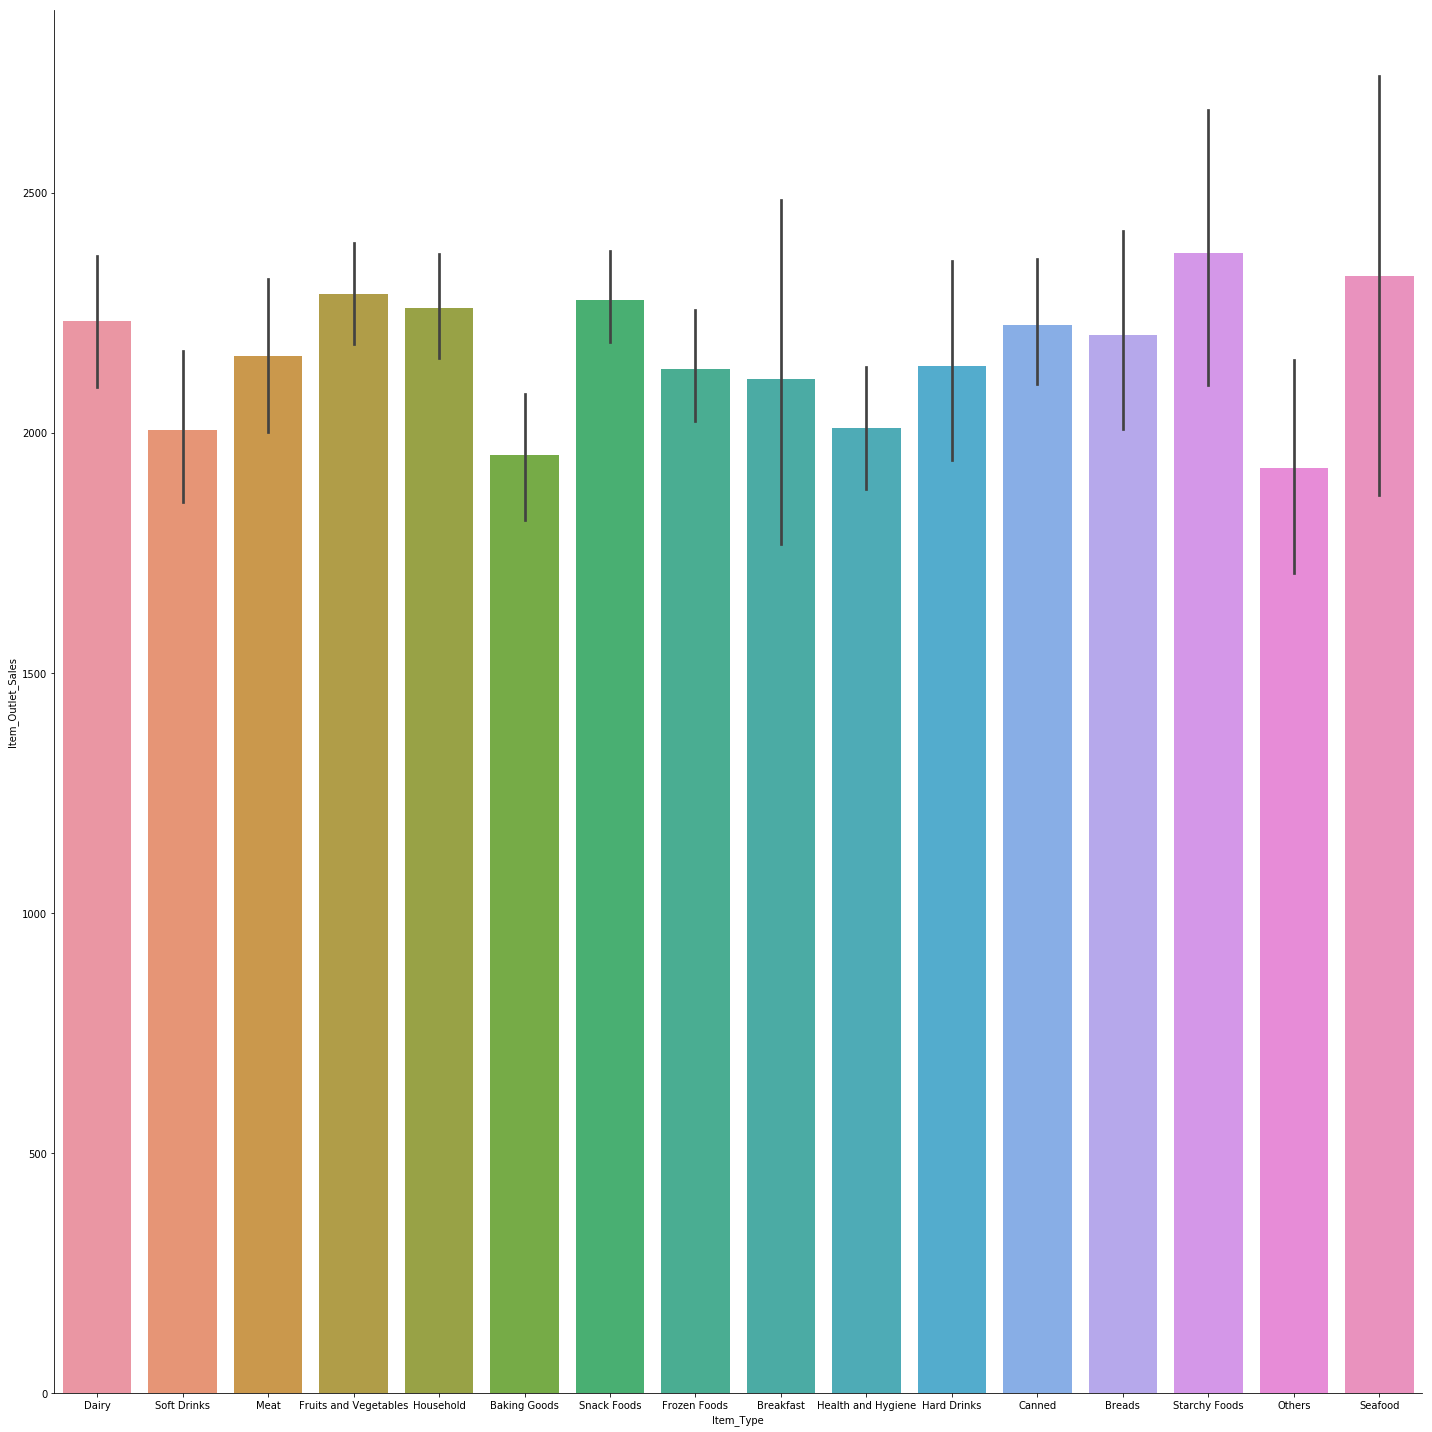

In [13]:
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", kind="bar", data=df,size=20);

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


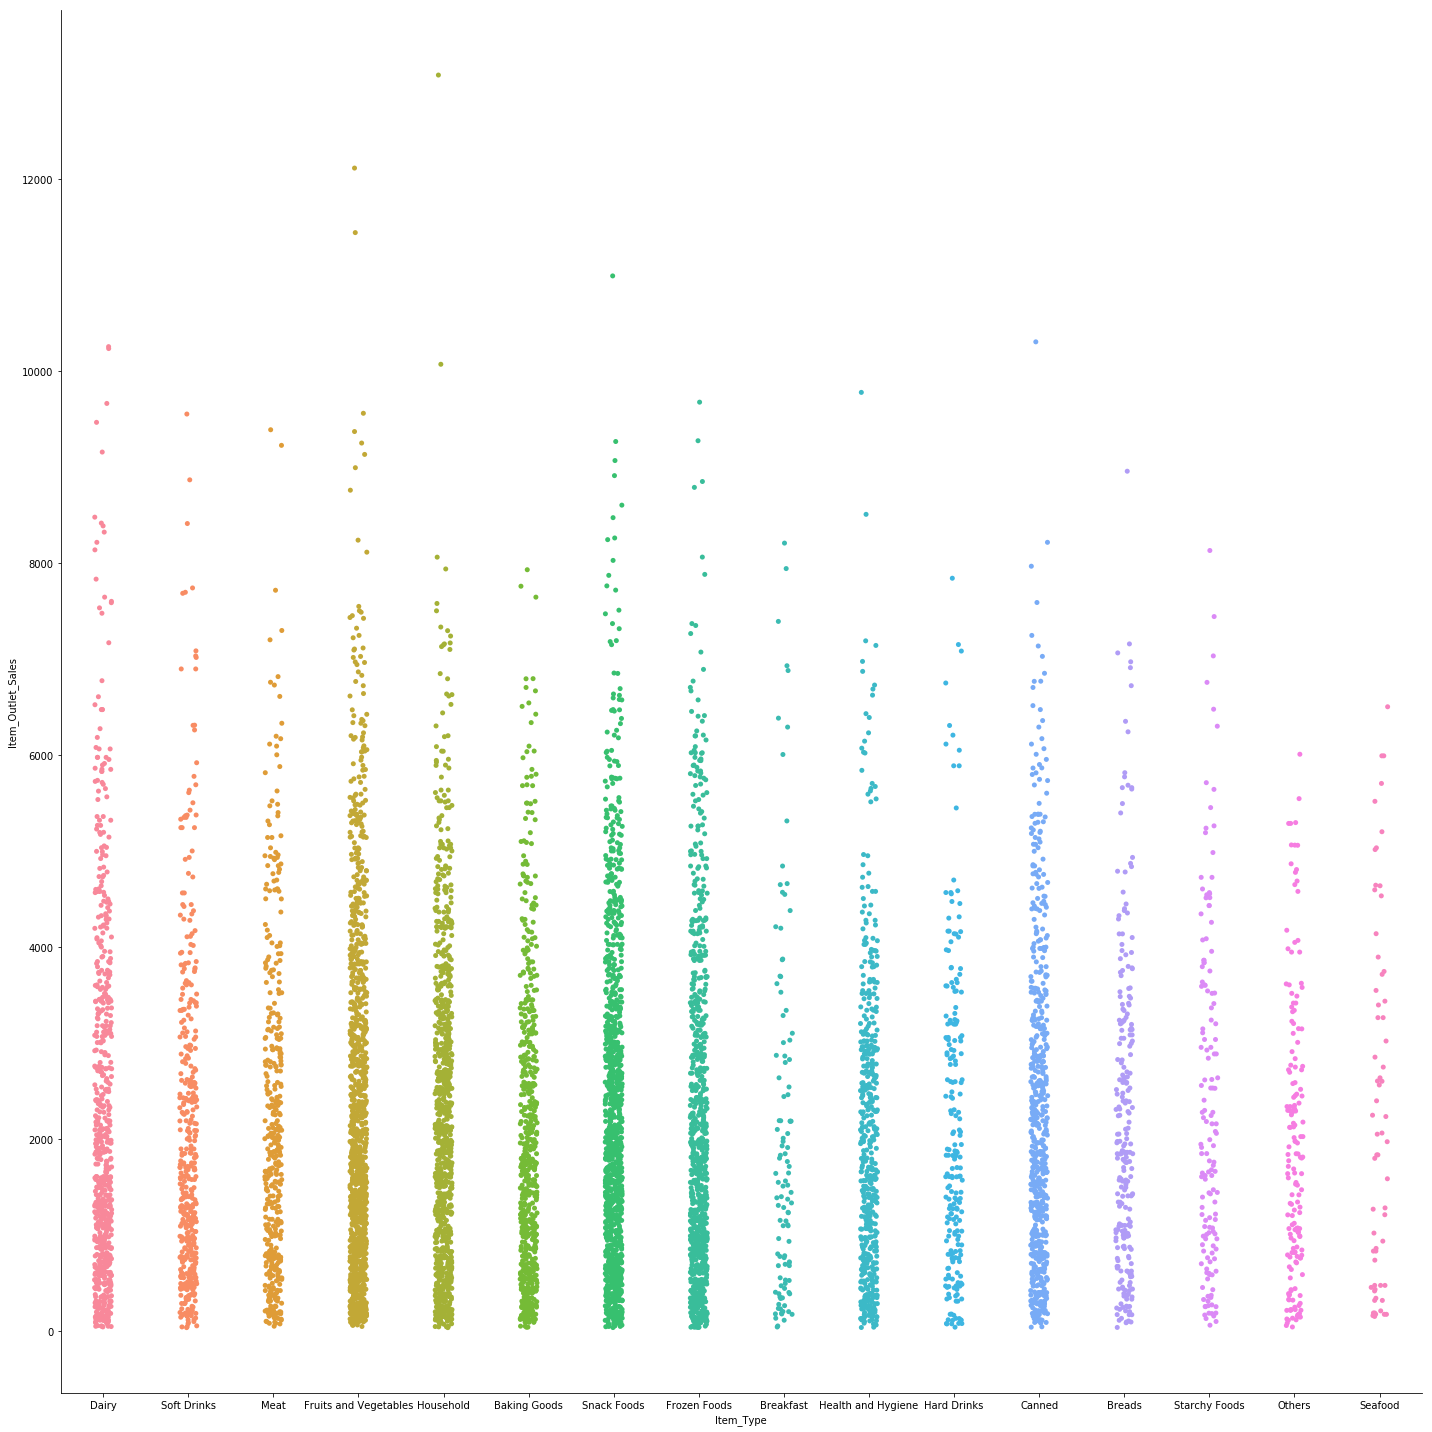

In [14]:

sns.catplot(x="Item_Type", y="Item_Outlet_Sales", data=df,size=20);

In [15]:
fat_content=df["Item_Fat_Content"]
count=-1
for i in fat_content:
    count=count+1
    if i == "low fat":
        fat_content[count]='Low Fat'
    elif i == 'LF':
        fat_content[count]='Low Fat'
    elif i=='reg':
        fat_content[count]='Regular'
        
    


c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


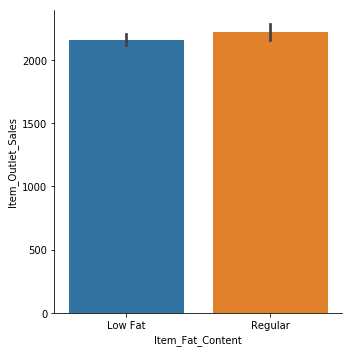

In [16]:
sns.catplot(x="Item_Fat_Content", y="Item_Outlet_Sales", kind="bar", data=df);

In [17]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

In [18]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [19]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [20]:
count=0
for i in df["Outlet_Size"]:
    #print(i)
    if i == "High":
        count=count+1
print(count)

932


In [21]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [22]:
s=df[df.Outlet_Establishment_Year<1990]

In [23]:
s.Item_Outlet_Sales.mean()

2411.8094877661797

In [24]:
s1=df[df.Outlet_Establishment_Year<2000]
s2=s1[s1.Outlet_Establishment_Year>1990]



In [25]:
print(s2.Item_Outlet_Sales.mean())

1859.505238426501


In [26]:
s3=df[df.Outlet_Establishment_Year>2000]

In [27]:
print(s3.Item_Outlet_Sales.mean())

2241.889721626717


In [28]:
df.shape


(8523, 12)

In [29]:
pd.value_counts(df['Outlet_Type'].values, sort=False)

Supermarket Type1    5577
Supermarket Type3     935
Grocery Store        1083
Supermarket Type2     928
dtype: int64

In [30]:
size=df[df.Outlet_Type=="Grocery Store"].Outlet_Size

In [31]:
pd.value_counts(size,sort=False)

Small    528
Name: Outlet_Size, dtype: int64

In [32]:
size=df[df.Outlet_Type=="Supermarket Type2"].Outlet_Size
pd.value_counts(size,sort=False)

Medium    928
Name: Outlet_Size, dtype: int64

In [33]:
size=df[df.Outlet_Type=="Supermarket Type1"].Outlet_Size
pd.value_counts(size,sort=False)

High       932
Medium     930
Small     1860
Name: Outlet_Size, dtype: int64

In [34]:
size=df[df.Outlet_Type=="Supermarket Type3"].Outlet_Size
pd.value_counts(size,sort=False)

Medium    935
Name: Outlet_Size, dtype: int64

In [35]:
count=-1
ls=[]
for i in (df.Outlet_Size.isnull()):
    count=count+1
    if(i):
        ls.append(count)


In [36]:
new_type=df.Outlet_Size
for i in ls:
    if df.iloc[i].Outlet_Type=="Grocery Store":
        new_type[i]="Small"
    elif df.iloc[i].Outlet_Type=="Supermarket Type1":
        new_type[i]="Small"
    elif df.iloc[i].Outlet_Type=="Supermarket Type2":
        new_type[i]="Medium"
    else:
        new_type[i]="Medium"

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
del df["Outlet_Size"]

In [38]:
df["new_size"]=new_type

In [39]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
new_size                     0
dtype: int64

In [40]:
del df["Outlet_Establishment_Year"]

In [41]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [42]:
df["Item_Fat_Content"].unique()        

array(['Low Fat', 'Regular'], dtype=object)

In [43]:
df=pd.get_dummies(df,columns=["Item_Fat_Content"],drop_first=True)

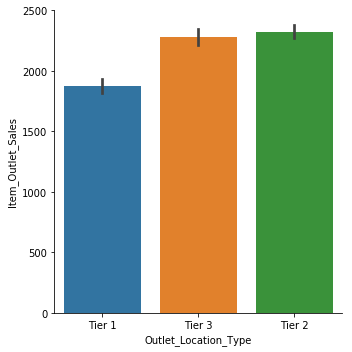

In [46]:
sns.catplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", kind="bar", data=df);

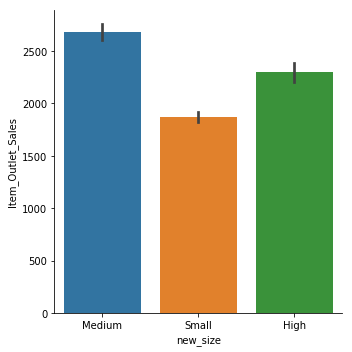

In [60]:
sns.catplot(x="new_size", y="Item_Outlet_Sales", kind="bar", data=df);

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


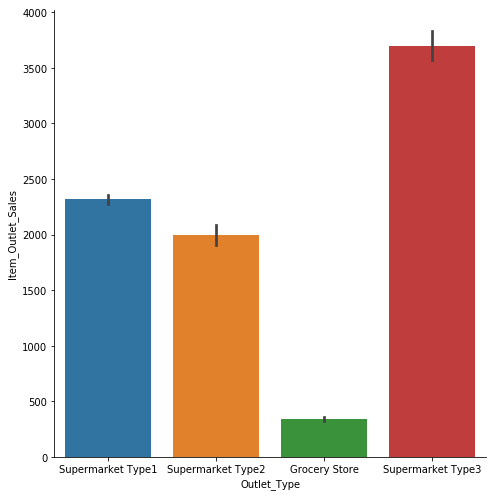

In [62]:
sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales", kind="bar", data=df,size=7);

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


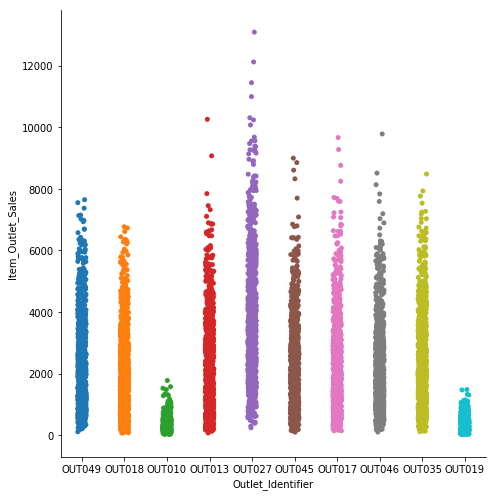

In [63]:
sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales",data=df,size=7);

In [64]:
df=pd.get_dummies(df,columns=["Outlet_Location_Type"],drop_first=True)

In [65]:
df=pd.get_dummies(df,columns=["new_size"],drop_first=True)

In [66]:
df=pd.get_dummies(df,columns=["Outlet_Type"],drop_first=True)

In [68]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [69]:
del df["Item_Identifier"]

In [70]:
del df["Item_Type"]

In [71]:
del df["Outlet_Identifier"]

In [72]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,new_size_Medium,new_size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,1,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,1,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,1,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,1,0,0,1,0,0


In [73]:
label=df["Item_Outlet_Sales"]

In [80]:
#del df["Item_Outlet_Sales"]
del df["Item_Visibility"]

In [81]:
df.head()

,Item_Weight,Item_MRP,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,new_size_Medium,new_size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,0,0,0,1,0,1,0,0
1,5.92,48.2692,1,0,1,1,0,0,1,0
2,17.50,141.6180,0,0,0,1,0,1,0,0
3,19.20,182.0950,1,0,1,0,1,0,0,0
4,8.93,53.8614,0,0,1,0,0,1,0,0


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(df))

print(data.shape)

(8523, 10)


In [83]:
data.shape
#label.head()


(8523, 10)

In [84]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.282525,0.927507,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.081274,0.072068,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.468288,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.871986,0.640093,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.095805,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [93]:
data[10]=data[0]*data[0]

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg = LinearRegression().fit(data,label)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(data, label)))
#print('R-squared score (test): {:.3f}'
     #.format(linreg.score(X_test, y_test)))


linear model coeff (w): [ 296.27958565 3666.82243125   50.56366629   59.25036442    6.05030811
   71.9824718   -24.80677588 1925.23428176 1545.72156972 3250.22358412
 -300.3012266 ]
linear model intercept (b): -1414.005
R-squared score (training): 0.563


In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
data_poly = poly.fit_transform(data)
print(data_poly.shape)

(8523, 78)


In [100]:
from sklearn.linear_model import Lasso
linreg = Lasso(alpha=10.0).fit(data_poly, label)
#print('linear model coeff (w): {}'
     #.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
    .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(data_poly, label)))


linear model intercept (b): 345.176
R-squared score (training): 0.598
